# Sprint ディープラーニングフレームワーク2

## 【問題1】公式チュートリアルモデルを分担して実行

TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

 - 基本的な画像分類（はじめてのニューラルネットワーク：分類問題の初歩）

## 【問題3】Iris（2値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [10]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
# データセットの読み込み
dataset_path ="../Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [11]:
X_train.shape

(64, 4)

In [49]:
#  Functional APIモデル - 3層
input_data = tf.keras.layers.Input(shape=(4,)) # Paramが0でおかしい？
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
# モデルをコンパイル
model.compile(loss='binary_crossentropy',
            optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
            metrics=['accuracy'])

In [60]:
# 学習の実施
history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=50,
                    verbose=1,
                    validation_data = (X_val, y_val))

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 1s 13ms/sample - loss: 0.4767 - acc: 0.8750 - val_loss: 0.4537 - val_acc: 0.9375
Epoch 2/50
64/64 [==============================] - 0s 2ms/sample - loss: 0.4651 - acc: 0.8594 - val_loss: 0.4337 - val_acc: 0.9375
Epoch 3/50
64/64 [==============================] - 0s 1ms/sample - loss: 0.4677 - acc: 0.9062 - val_loss: 0.4540 - val_acc: 0.9375
Epoch 4/50
64/64 [==============================] - 0s 1ms/sample - loss: 0.4583 - acc: 0.8906 - val_loss: 0.4227 - val_acc: 1.0000
Epoch 5/50
64/64 [==============================] - 0s 1ms/sample - loss: 0.4627 - acc: 0.8438 - val_loss: 0.4483 - val_acc: 0.9375
Epoch 6/50
64/64 [==============================] - 0s 2ms/sample - loss: 0.4513 - acc: 0.8594 - val_loss: 0.4215 - val_acc: 0.9375
Epoch 7/50
64/64 [==============================] - 0s 2ms/sample - loss: 0.4535 - acc: 0.8906 - val_loss: 0.4214 - val_acc: 0.9375
Epoch 8/50
64/64 [=============

In [58]:
# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.46684011816978455
Train accuracy: 0.90625
Test loss: 0.4672594964504242
Test accuracy: 0.9


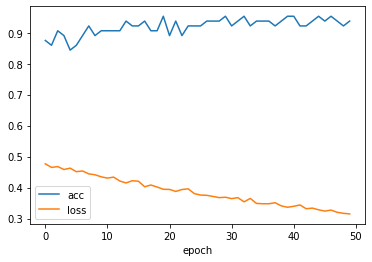

In [61]:
# 結果をプロット
plt.plot(history.epoch, history.history["acc"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend();

## 【問題4】Iris（多値分類）をKerasで学習

In [77]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを多値分類する
"""
import keras

# データセットの読み込み
dataset_path ="../Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
# df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y[y=='Iris-setosa'] = 2 # 追加
#y = y.astype(np.int)[:, np.newaxis]

# OneHotEncoderの実施
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = one_hot_enc.fit_transform(y[:, np.newaxis])

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [83]:
X_train.shape

(96, 4)

In [107]:
#  Functional APIモデル - 3層
input_data = tf.keras.layers.Input(shape=(4,)) # Paramが0でおかしい？
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________


In [85]:
# モデルをコンパイル
model.compile(loss='binary_crossentropy',
            optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
            metrics=['accuracy'])

In [86]:
# 学習の実施
history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=50,
                    verbose=1,
                    validation_data = (X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 1s 10ms/sample - loss: 0.4498 - acc: 0.7604 - val_loss: 0.3585 - val_acc: 0.8056
Epoch 2/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.3081 - acc: 0.8542 - val_loss: 0.2916 - val_acc: 0.8333
Epoch 3/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.2347 - acc: 0.8785 - val_loss: 0.2140 - val_acc: 0.8750
Epoch 4/50
96/96 [==============================] - 0s 2ms/sample - loss: 0.1443 - acc: 0.9479 - val_loss: 0.1504 - val_acc: 0.9444
Epoch 5/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.1099 - acc: 0.9618 - val_loss: 0.1329 - val_acc: 0.9583
Epoch 6/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.0766 - acc: 0.9722 - val_loss: 0.2053 - val_acc: 0.8889
Epoch 7/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.0863 - acc: 0.9722 - val_loss: 0.1130 - val_acc: 0.9444
Epoch 8/50
96/96 [=============

In [87]:
# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.05331041229267915
Train accuracy: 0.9791667
Test loss: 0.03223688527941704
Test accuracy: 0.9777778


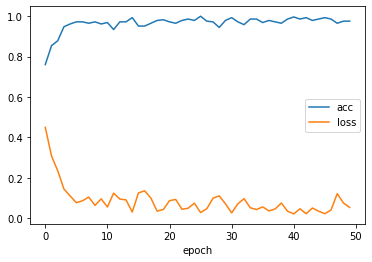

In [88]:
# 結果をプロット
plt.plot(history.epoch, history.history["acc"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend();

## 【問題5】House PricesをKerasで学習

回帰問題のデータセットであるHouse Pricesを使用したモデルを作成してください。


House Prices: Advanced Regression Techniques


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使ってください。説明変数はさらに増やしても構いません。


分類問題と回帰問題の違いを考慮してください。

In [109]:
from sklearn.preprocessing import StandardScaler

"""
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換え
"""
# データセットの読み込み
dataset_path ="./house_train.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
# df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y)
X = np.array(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 標準化の実施
sr = StandardScaler()
X_train_std = sr.fit_transform(X_train)
X_test_std = sr.transform(X_test)
X_val_std = sr.transform(X_val)

In [110]:
X_train.shape, y_train.shape

((934, 2), (934,))

In [113]:
# 回帰モデルの作成

model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer = tf.train.AdamOptimizer(learning_rate = 0.01))

In [114]:
# 学習の実施
history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=50,
                    verbose=1,
                    validation_data = (X_val, y_val))

Train on 934 samples, validate on 234 samples
Epoch 1/50
934/934 [==============================] - 2s 2ms/step - loss: 13829279246.2869 - val_loss: 3149259324.8547
Epoch 2/50
934/934 [==============================] - 1s 877us/step - loss: 3682781064.8394 - val_loss: 2787426359.7949
Epoch 3/50
934/934 [==============================] - 1s 924us/step - loss: 3487408608.9593 - val_loss: 2614549904.9573
Epoch 4/50
934/934 [==============================] - 1s 1ms/step - loss: 3262360541.2762 - val_loss: 2697854708.6496
Epoch 5/50
934/934 [==============================] - 1s 1ms/step - loss: 3188811424.7623 - val_loss: 2471560199.3162
Epoch 6/50
934/934 [==============================] - 1s 1ms/step - loss: 3182184957.0535 - val_loss: 2483869417.5043
Epoch 7/50
934/934 [==============================] - 1s 1ms/step - loss: 3149530942.3041 - val_loss: 2435428828.7179
Epoch 8/50
934/934 [==============================] - 1s 1ms/step - loss: 3149777016.1884 - val_loss: 2492404595.0769
Epoch

In [120]:
# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)

test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score)

Train loss: 3147463337.3875804
Test loss: 3959926755.9452057


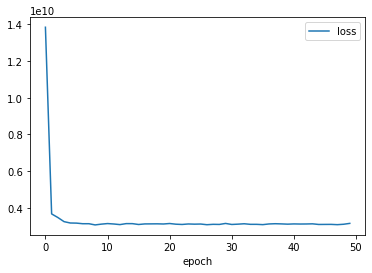

In [119]:
# 結果をプロット
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend();

回帰分析のため、出力層では活性化関数を使用しない（又はそのまま出力する恒等関数を使用する）

## 【問題6】MNISTをKerasで学習

ニューラルネットワークのスクラッチで使用したMNISTを分類するモデルを作成してください。


3クラス以上の分類という点ではひとつ前のIrisと同様です。入力が画像であるという点で異なります。

In [166]:
# データの読み込み
from keras.datasets import mnist
(x_train, y_train), (X_test, y_test) = mnist.load_data()

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [167]:
#2次元配列を1次元に変換
X_train = X_train.reshape(48000, 784)
X_val = X_val.reshape(12000, 784)
X_test = X_test.reshape(10000, 784)
#float32型に変換
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
#正規化 [0-255]->[0.0-1.0]
X_train /= 255       
X_val /= 255  
X_test /= 255

# ラベルデータを0-9までのカテゴリを表す配列に変換
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [168]:
X_train.shape, y_train.shape,X_val.shape, y_val.shape, x_test.shape, y_test.shape

((48000, 784),
 (48000, 10),
 (12000, 784),
 (12000, 10),
 (10000, 28, 28),
 (10000, 10))

In [169]:
# #  Functional APIモデル - 3層
# input_data = tf.keras.layers.Input(shape=(784,)) # Paramが0でおかしい？
# x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
# x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
# output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)
# model = tf.keras.Model(inputs=input_data, outputs=output)

from keras.layers import Dense, Dropout

#モデルの構造の定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [170]:
from keras.optimizers import Adam

# モデルをコンパイル
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

In [174]:
# 学習の実施
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=10,
                    verbose=1,
                    validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 406us/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.0922 - val_accuracy: 0.9813
Epoch 2/10
48000/48000 [==============================] - 22s 464us/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0988 - val_accuracy: 0.9833
Epoch 3/10
48000/48000 [==============================] - 21s 436us/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.1023 - val_accuracy: 0.9832
Epoch 4/10
48000/48000 [==============================] - 21s 433us/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.1083 - val_accuracy: 0.9822
Epoch 5/10
48000/48000 [==============================] - 18s 377us/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.1150 - val_accuracy: 0.9818
Epoch 6/10
48000/48000 [==============================] - 18s 369us/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.1210 - val_accuracy: 0.9818
Epoch 7/10
48000/48000 [==============================] 

In [175]:
# 評価
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.0020883907699541706
Train accuracy: 0.9993958473205566
Test loss: 0.08995832022983397
Test accuracy: 0.9830999970436096
